In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Visualization

In [59]:
data=pd.read_csv('covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [60]:
byCountry=data.groupby(['Country/Region', 'Date']).sum()

In [61]:
byCountry['Mortality_rate']=byCountry['Deaths']/byCountry['Confirmed']
byCountry['Recovery_rate']=byCountry['Recovered']/byCountry['Confirmed']

In [62]:
byCountry.head()

Lat  Long  Confirmed  Deaths  Recovered  \
Country/Region Date                                                
Afghanistan    1/22/20  33.0  65.0          0       0          0   
               1/23/20  33.0  65.0          0       0          0   
               1/24/20  33.0  65.0          0       0          0   
               1/25/20  33.0  65.0          0       0          0   
               1/26/20  33.0  65.0          0       0          0   

                        Mortality_rate  Recovery_rate  
Country/Region Date                                    
Afghanistan    1/22/20             NaN            NaN  
               1/23/20             NaN            NaN  
               1/24/20             NaN            NaN  
               1/25/20             NaN            NaN  
               1/26/20             NaN            NaN

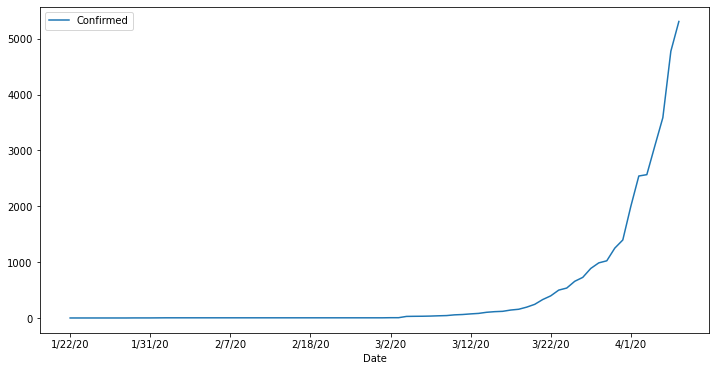

In [64]:
byCountry.loc['India'].reset_index().sort_values(by='Confirmed').plot('Date','Confirmed',figsize=(12,6))

India
Note: Multiple entries mus be seperated with comma(,)
1.Confirmed
2.Deaths
3.Recovered
4.Mortality rate
5.Recovery Rate
:-->
1


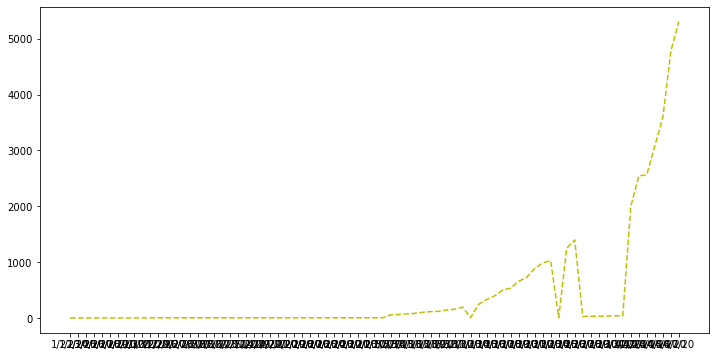

In [65]:
def display(ct,ch):
    flag=0
    if(ch==[]):
        print('Enter a valid Choice')
    else:
        plt.figure(figsize=(12,6))
        if(1 in ch):
            flag=1
            plt.plot(byCountry.loc[ct].reset_index()['Date'],byCountry.loc[ct].reset_index()['Confirmed'],'y--')
        if(2 in ch):
            flag=1
            plt.plot(byCountry.loc[ct].reset_index()['Date'],byCountry.loc[ct].reset_index()['Deaths'],'r-')
        if(3 in ch):
            flag=1
            plt.plot(byCountry.loc[ct].reset_index()['Date'],byCountry.loc[ct].reset_index()['Recovered'],'g-')
        if(4 in ch):
            flag=1
            plt.plot(byCountry.loc[ct].reset_index()['Date'],byCountry.loc[ct].reset_index()['Mortality_rate'],'r--')
        if(5 in ch):
            flag=1
            plt.plot(byCountry.loc[ct].reset_index()['Date'],byCountry.loc[ct].reset_index()['Recovery_rate'],'g--')
        if(flag==0):
            print('Enter a valid choice.')
country=input()
while(country not in np.array(data['Country/Region'])):
      country=input()
print('Note: Multiple entries mus be seperated with comma(,)\n1.Confirmed\n2.Deaths\n3.Recovered\n4.Mortality rate\n5.Recovery Rate\n:-->')
choice=list(map(int,input().split(',')))
display(country,choice)

# Tranformation for Predictor

In [8]:
byCountry.head()

Lat  Long  Confirmed  Deaths  Recovered  \
Country/Region Date                                                
Afghanistan    1/22/20  33.0  65.0          0       0          0   
               1/23/20  33.0  65.0          0       0          0   
               1/24/20  33.0  65.0          0       0          0   
               1/25/20  33.0  65.0          0       0          0   
               1/26/20  33.0  65.0          0       0          0   

                        Mortality_rate  Recovery_rate  
Country/Region Date                                    
Afghanistan    1/22/20             NaN            NaN  
               1/23/20             NaN            NaN  
               1/24/20             NaN            NaN  
               1/25/20             NaN            NaN  
               1/26/20             NaN            NaN

In [9]:
byCountry.reset_index(inplace=True)

In [10]:
byCountry.head()

,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered,Mortality_rate,Recovery_rate
0,Afghanistan,1/22/20,33.0,65.0,0,0,0,NaN,NaN
1,Afghanistan,1/23/20,33.0,65.0,0,0,0,NaN,NaN
2,Afghanistan,1/24/20,33.0,65.0,0,0,0,NaN,NaN
3,Afghanistan,1/25/20,33.0,65.0,0,0,0,NaN,NaN
4,Afghanistan,1/26/20,33.0,65.0,0,0,0,NaN,NaN


In [11]:
confirmedCountry=byCountry.pivot_table(index='Date',columns='Country/Region',values='Confirmed')

In [12]:
confirmedCountry.reset_index(inplace=True)
confirmedCountry.reset_index(inplace=True)

In [13]:
confirmedCountry.head()

Country/Region,index,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
0,0,1/22/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1/23/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,2,1/24/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,3,1/25/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,4,1/26/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [14]:
confirmedCountry.rename(columns={'index':'Day_no'},inplace=True)

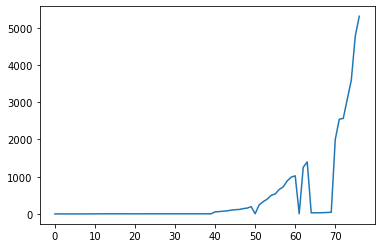

In [15]:
confirmedCountry['India'].plot()

# Training Data with sample of India

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
lm=LinearRegression()

In [18]:
X_poly=PolynomialFeatures(degree=6).fit_transform(np.array(confirmedCountry['Day_no']).reshape(-1,1))

In [19]:
lm.fit(X_poly,confirmedCountry['India'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred=lm.predict(X_poly)

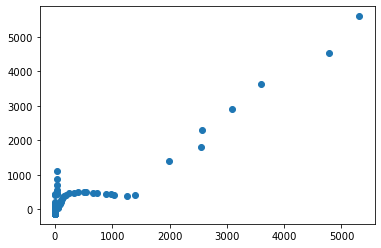

In [21]:
plt.scatter(confirmedCountry['India'],pred)

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(confirmedCountry['India'],pred))
r2 = r2_score(confirmedCountry['India'],pred)
print(rmse)
print(r2)

317.6874774898939
0.9069935913183186


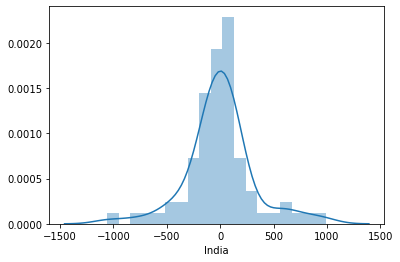

In [23]:
sns.distplot(confirmedCountry['India']-pred)

In [24]:
day=PolynomialFeatures(degree=6).fit_transform(np.array([int(input())]).reshape(-1,1))

72


In [25]:
lm.predict(day)[0]

2288.6793461025827

In [26]:
confirmedCountry[confirmedCountry['Day_no']==int(input())]['India']

72


72    2567
Name: India, dtype: int64

India
72
317.6874774898939
0.9069935913183186
Predicted: 1797
Actual: 71    2543
Name: India, dtype: int64


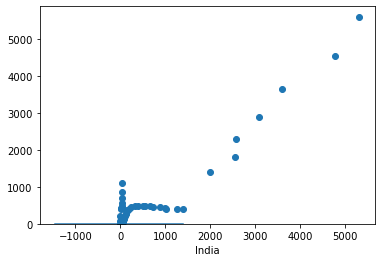

In [27]:
def predictor(ct,dayno):
    lm.fit(X_poly,confirmedCountry[ct])
    pred=lm.predict(X_poly)
    plt.scatter(confirmedCountry[ct],pred)
    sns.distplot(confirmedCountry[ct]-pred)
    rmse = np.sqrt(mean_squared_error(confirmedCountry[ct],pred))
    r2 = r2_score(confirmedCountry[ct],pred)
    print(rmse)
    print(r2)
    day=PolynomialFeatures(degree=6).fit_transform(np.array([dayno]).reshape(-1,1))
    print('Predicted:',np.int(lm.predict(day)[0]))
    print('Actual:',confirmedCountry[confirmedCountry['Day_no']==dayno][ct])
country=input()
while(country not in confirmedCountry.columns):
    country=input()
day=int(input())
predictor(country,day-1)

In [28]:
print("The above model is not capable to give good prediction for every Country")
print('Could be fixed using GridScan as we used in SVM')

The above model is not capable to give good prediction for every Country
Could be fixed using GridScan as we used in SVM


# Predictor based by removing Nan values


In [29]:
confirmedCountry.head()

Country/Region,Day_no,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
0,0,1/22/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1/23/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,2,1/24/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,3,1/25/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,4,1/26/20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [30]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [31]:
byCountry.head()

,Country/Region,Date,Lat,Long,Confirmed,Deaths,Recovered,Mortality_rate,Recovery_rate
0,Afghanistan,1/22/20,33.0,65.0,0,0,0,NaN,NaN
1,Afghanistan,1/23/20,33.0,65.0,0,0,0,NaN,NaN
2,Afghanistan,1/24/20,33.0,65.0,0,0,0,NaN,NaN
3,Afghanistan,1/25/20,33.0,65.0,0,0,0,NaN,NaN
4,Afghanistan,1/26/20,33.0,65.0,0,0,0,NaN,NaN


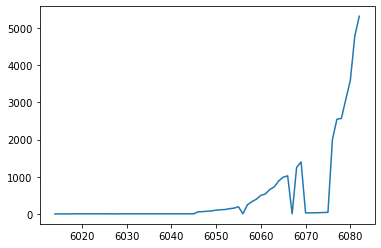

In [44]:
byCountry[byCountry['Country/Region']=='India'].dropna()['Confirmed'].plot()

In [47]:
byCountry.loc[6070]

Country/Region       India
Date                3/4/20
Lat                     21
Long                    78
Confirmed               28
Deaths                   0
Recovered                3
Mortality_rate           0
Recovery_rate     0.107143
Name: 6070, dtype: object

In [51]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [55]:
data.groupby('Country/Region','Date').sum()

ValueError: No axis named Date for object type <class 'pandas.core.frame.DataFrame'>